<a href="https://colab.research.google.com/github/mruzair44/Programming-For-Artificial-intelligence/blob/main/Muhammad_Uzair_MID_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:Muhammad Uzair,  Reg No:B22F1113AI111, Lab: Mid Exam ML**


Data Loading And Exploration:


Display first five rows by using head functions

In [ ]:
import pandas as pd
data = pd.read_csv('/content/housing (1).csv')
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Check Data types

In [ ]:
data.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


Check For Missing Values

In [ ]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Task :2

Histogram For Numeerical Features
Scattering Plot for Two Features:

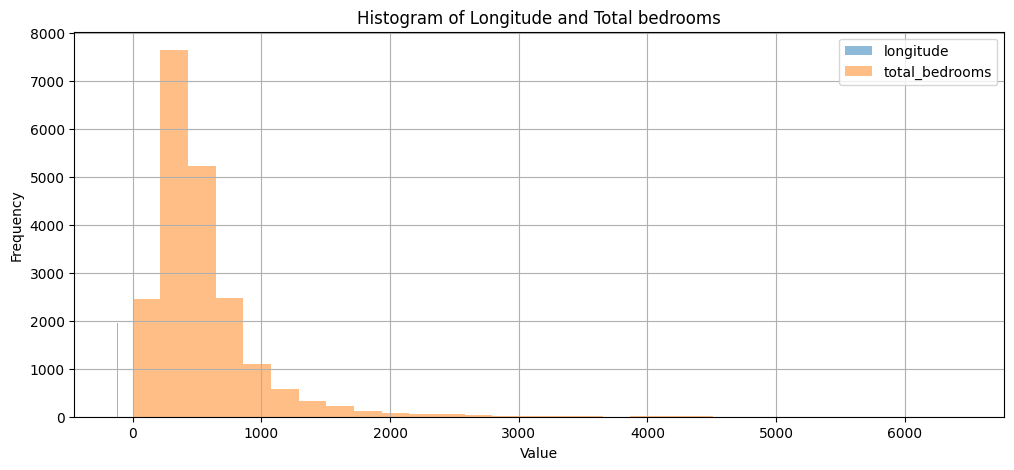

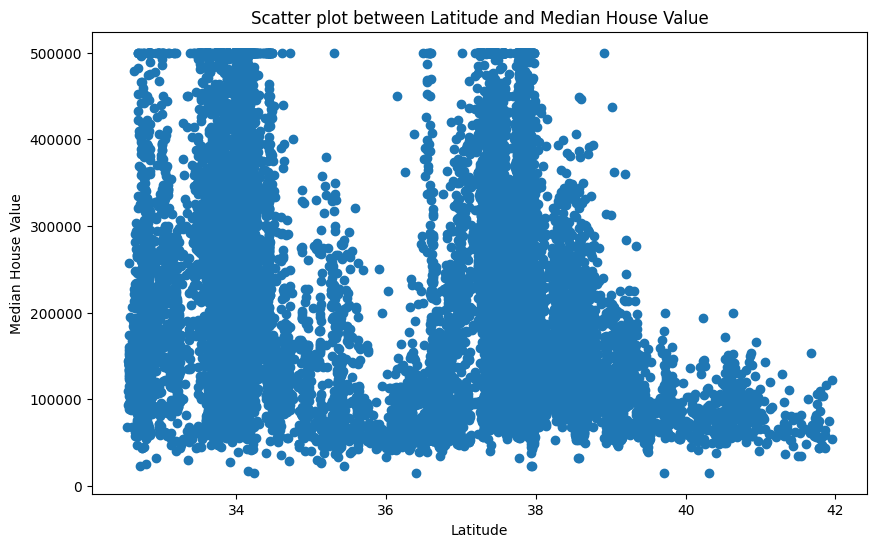

In [ ]:
import matplotlib.pyplot as plt

# Histogram for 'longitude' and 'total_rooms'
plt.figure(figsize=(12, 5))

data['longitude'].hist(bins=30, alpha=0.5, label='longitude')
data['total_bedrooms'].hist(bins=30, alpha=0.5, label='total_bedrooms')
plt.legend()
plt.title('Histogram of Longitude and Total bedrooms')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Scatter plot between 'latitude' and 'median_house_value'
plt.figure(figsize=(10, 6))
plt.scatter(data['latitude'], data['median_house_value'])
plt.xlabel('Latitude')
plt.ylabel('Median House Value')
plt.title('Scatter plot between Latitude and Median House Value')
plt.show()


Observing Anomalies and Outliers

1. Histogram for Longitude:
   The histogram for `longitude` shows the distribution of properties across different geographical locations.
   Anomalies may include values significantly outside the common range (e.g., below -125 or above -115). These could represent properties located far from the main region of interest, or they might be data entry errors.

2. Histogram for Total Bedrooms: For total_bedrooms, extreme
  values on the far right of the histogram indicate properties with an unusually high number of bedrooms. These points could be legitimate but rare cases (e.g., large houses) or possible anomalies due to data input inconsistencies

3. Scatter Plot of Latitude vs. Median House Value:
    The scatter plot reveals the relationship between `latitude` and `median_house_value`.
   Points that lie significantly away from the main distribution may indicate anomalies, such as luxury properties with high values at unusual locations or potential data entry errors.
    Notably, isolated points with extreme house values for a specific latitude are potential outliers that may require further investigation.



Task:3
Data Preprocessing and Linear Regression

In [ ]:
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)


Implement Linear Regression:

Evaluate using Mean Squared Error and R-squared:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = data[['longitude', 'total_bedrooms']]
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 13034946021.561293
R-squared: 0.005276502374130909


Task 4:

**Binary Classification and Evaluation:**

 spam file

Into  spam or not spam concepts

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

Confusion Matrix:
 [[956   9]
 [ 18 132]]
Accuracy: 0.9757847533632287
Precision: 0.9361702127659575
Recall: 0.88
F1 Score: 0.9072164948453608


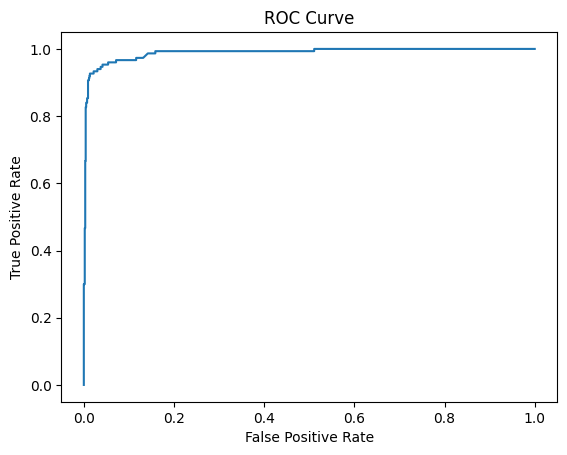

In [ ]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

data = data[['class', 'message']]

data['is_spam'] = data['class'].apply(lambda x: 1 if x == 'spam' else 0)

X = data['message']
y = data['is_spam']

tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


Task:5

**Model Performance Enhancement:**

Standardize the features

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [ ]:
# Load the dataset (replace 'housing.csv' with the actual dataset path)
data = pd.read_csv('/content/housing (1).csv')

# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute missing values in numeric columns with mean
imputer_num = SimpleImputer(strategy='mean')
data_numeric = pd.DataFrame(imputer_num.fit_transform(data[numeric_cols]), columns=numeric_cols)

# Impute missing values in categorical columns with the most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
data_categorical = pd.DataFrame(imputer_cat.fit_transform(data[categorical_cols]), columns=categorical_cols)

# Combine the numeric and categorical data
data_imputed = pd.concat([data_numeric, data_categorical], axis=1)

# Convert categorical columns to numeric using one-hot encoding
data_imputed = pd.get_dummies(data_imputed, drop_first=True)

# Define features (X) and target variable (y)
X = data_imputed.drop(columns=['median_house_value'])  # Replace 'median_house_value' with the target column name
y = data_imputed['median_house_value']

# Apply feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed for regularization strength
ridge_model.fit(X_train, y_train)

# Make predictions with both models
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate both models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Linear Regression Performance:")
print("MSE:", mse_linear)
print("R-squared:", r2_linear)

print("\nRidge Regression Performance:")
print("MSE:", mse_ridge)
print("R-squared:", r2_ridge)

# Brief Analysis on Overfitting/Underfitting
if r2_ridge > r2_linear:
    print("\nRidge Regression improved performance, suggesting regularization helped reduce overfitting.")
else:
    print("\nNo significant improvement with Ridge Regression, indicating the Linear model may not be overfitting.")


Linear Regression Performance:
MSE: 4904399775.949275
R-squared: 0.6257351821159706

Ridge Regression Performance:
MSE: 4903988388.873031
R-squared: 0.625766575908525

Ridge Regression improved performance, suggesting regularization helped reduce overfitting.


**Train Regression**
 and evaluate its performance relative to linear regression

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R-squared:", r2_ridge)


Ridge Regression MSE: 4903988388.873031
Ridge Regression R-squared: 0.625766575908525
